In [162]:
from IPython.display import display,HTML,IFrame
display(HTML('<h1 style="color:blue;text-align:center">LinearRegression Model</h1>'))

display(HTML('<div style="text-align:center"><p>Basically we do work only on LinearRegression model firstly we import neccessary files</p><br></div>'))

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline


In [165]:
display(HTML('<div><p><ol><li>From link we read CSV file</li><li>read data in data variable</li><li>Using sample function print random sample</li></ol></p></div>'))

In [74]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data=pd.read_csv(url)
data.sample(5)

,Hours,Scores
18,6.1,67
17,1.9,24
21,4.8,54
6,9.2,88
13,3.3,42


In [130]:
my_data=pd.DataFrame({"Hours":[10,11.2,12.5,15,17.4,18.11,19,12,10,8,16,11.4,7,8.3],"Scores":[94,96,95.21,97.43,92.4,98.3,95.67,99,98,94,90,93,90,95]})

In [131]:
my_data

,Hours,Scores
0,10.00,94.00
1,11.20,96.00
2,12.50,95.21
3,15.00,97.43
4,17.40,92.40
5,18.11,98.30
6,19.00,95.67
7,12.00,99.00
8,10.00,98.00
9,8.00,94.00


In [132]:
data=data.append(my_data,ignore_index=True)

In [133]:
data.describe()

,Hours,Scores
count,46.000000,46.000000
mean,8.791739,71.391739
std,5.236982,28.747945
min,1.100000,17.000000
25%,4.575000,43.250000
50%,8.150000,87.000000
75%,11.850000,95.157500
max,19.000000,99.000000


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   46 non-null     float64
 1   Scores  46 non-null     float64
dtypes: float64(2)
memory usage: 864.0 bytes


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


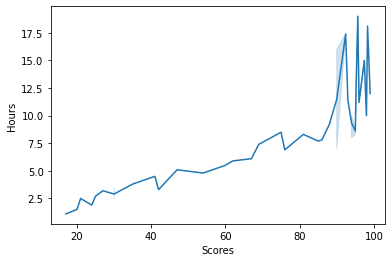

In [135]:
sns.lineplot(data.Scores,data.Hours)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


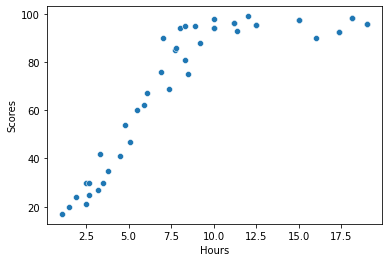

In [136]:
sns.scatterplot(data.Hours,data.Scores)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


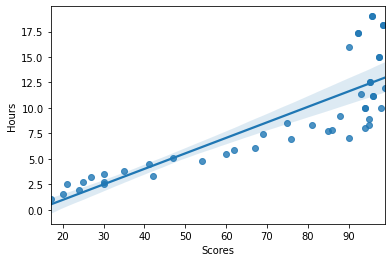

In [137]:
sns.regplot(data.Scores,data.Hours)

Text(0.5, 1.0, 'HOURS')

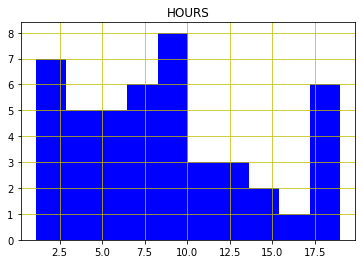

In [138]:
plt.hist(data.Hours,color='b')
plt.grid(color='y',linestyle='solid',linewidth=.75)
plt.title("HOURS")



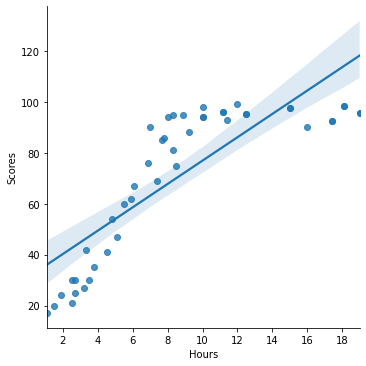

In [139]:
sns.lmplot(x='Hours',y='Scores',data=data,order=1,)

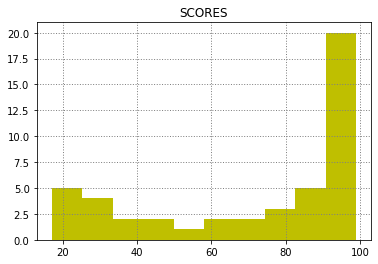

In [140]:
plt.hist(data['Scores'],color='y')
plt.grid(color='grey',linestyle=':',linewidth=1)
plt.title('SCORES')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

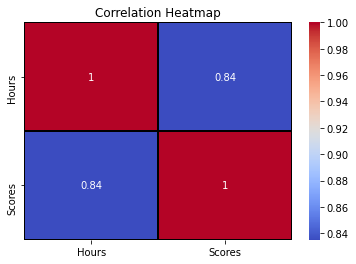

In [141]:
sns.heatmap(data.corr(method='pearson',min_periods=1),cmap='coolwarm',annot=True,linecolor='black',linewidths=0.5)
plt.title("Correlation Heatmap")

In [142]:
X=data.iloc[:,0].values.reshape(-1,1)
y=data.iloc[:,1].values

In [143]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [144]:
regmodel=LinearRegression()
regmodel.fit(X_train,y_train)
print("regression model is trained as regmodel")

regression model is trained as regmodel


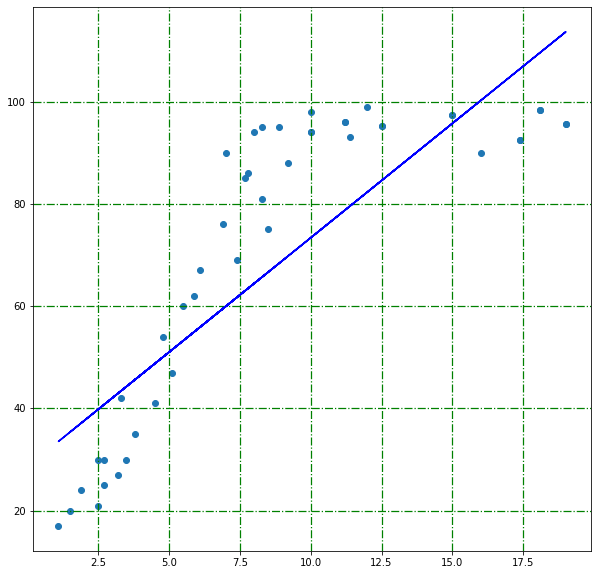

In [145]:
#  Y = m*X + C
fit_line=regmodel.coef_*X + regmodel.intercept_

plt.figure(figsize=(10,10))
plt.scatter(X,y)
plt.plot(X,fit_line,color='b')
plt.grid(color='g',linestyle='dashdot',linewidth=1.25)



In [146]:

regmodel.score(X,y)

0.6823709454110496

In [147]:
regmodel.score(X_test,y_test)

0.24494030085122595

In [148]:
y_pred=regmodel.predict(X_test)
score_df=pd.DataFrame({'Actual_Score':y_test,'Pred_score':y_pred})
score_df

,Actual_Score,Pred_score
0,99.00,82.301649
1,94.00,73.355875
2,96.00,78.723339
3,90.00,59.937214
4,97.43,95.720310
5,94.00,64.410101
6,30.00,44.282110
7,41.00,48.754997
8,81.00,65.751967
9,75.00,66.646545


In [149]:
hours=input("Enter Hours:-")
hours=int(hours)
pred_score=regmodel.predict([[hours]])
print("Input Hours = {}".format(hours))
print("Score for input hours = {}".format(pred_score[0]))

Enter Hours:-3
Input Hours = 3
Score for input hours = 42.045666674650235


In [150]:
metrics.mean_absolute_error(y_test,y_pred)

16.860584807222097

In [151]:
metrics.mean_squared_error(y_test,y_pred)

349.1470186288141

In [152]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

18.685476141346093